# Image thresholding
http://docs.opencv.org/3.1.0/d7/d4d/tutorial_py_thresholding.html#gsc.tab=0

In [1]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

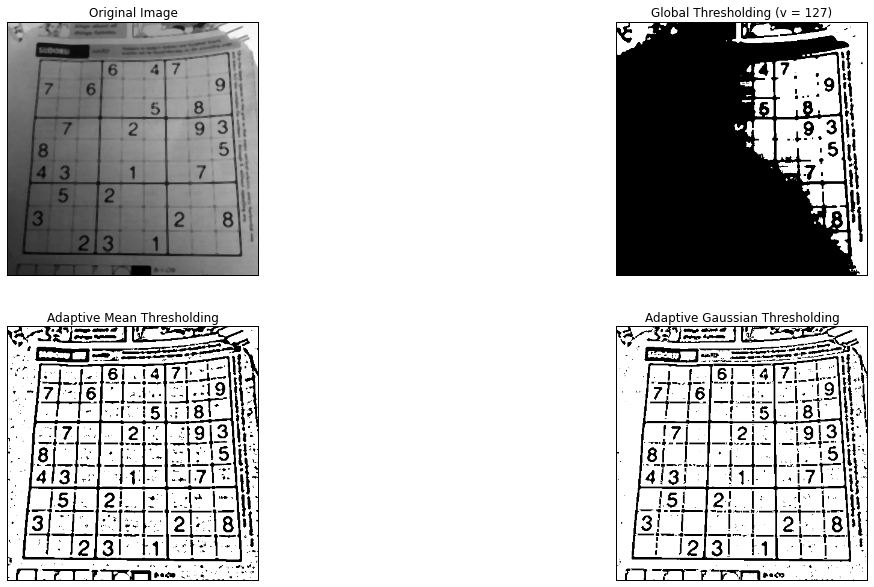

In [27]:
img = cv2.imread('images/sudoku.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(20,10))
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [5]:
# Otsu's thresholding after Gaussian filtering
def otsus_gaussian_threshold(img):
    blur = cv2.GaussianBlur(img, (5,5), 0)
    ret, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return blur, ret, th

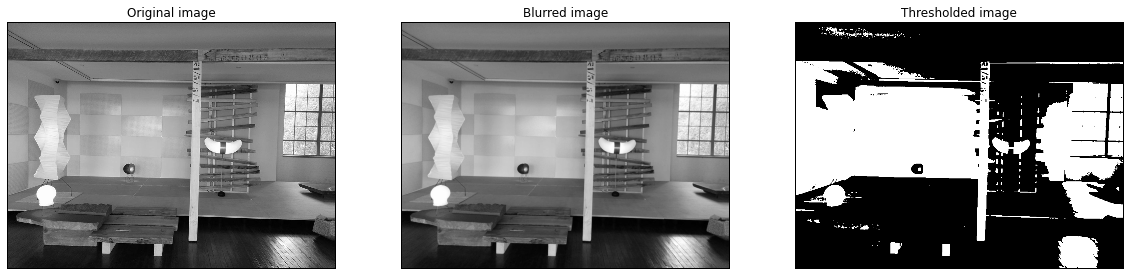

In [29]:
img = cv2.imread('images/noguchi01.jpg', cv2.IMREAD_GRAYSCALE)
blur, ret, th = otsus_gaussian_threshold(gray_img)
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1), plt.imshow(img, 'gray')
plt.title('Original image')
plt.xticks([]),plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(blur, 'gray')
plt.title('Blurred image')
plt.xticks([]),plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(th, 'gray')
plt.title('Thresholded image')
plt.xticks([]),plt.yticks([])
plt.show()